In [4]:
import json
import time
from time import perf_counter

def ouvrir_json(chemin):
    f = open(chemin, encoding="utf-8")
    toto = json.load(f)
    f.close()
    return toto

def ecrire_json(chemin, contenu):
    w = open(chemin, "w", encoding="utf-8")
    w.write(json.dumps(contenu, indent=2, ensure_ascii=False))
    w.close()

In [2]:
import spacy
nlp_sm = spacy.load("fr_core_news_sm")
nlp_md = spacy.load("fr_core_news_md")
nlp_lg = spacy.load("fr_core_news_lg")

In [6]:
f1 = ouvrir_json("/Users/mustapha/Documents/GitHub/Memoire/clean_data_echantillons/aventurier_paroles.json")
f2 = ouvrir_json("/Users/mustapha/Documents/GitHub/Memoire/Data/voc_glaff.json")

In [22]:
start1 =time.perf_counter()
loc_sm=[]
for texte in f1:
    try:
        doc = nlp_sm(texte)
        for entity in doc.ents:
            if entity.label_ =="LOC":
                loc_sm.append(entity.text)
    except:
        pass
end1 =time.perf_counter()

ecrire_json("/Users/mustapha/Documents/GitHub/Memoire/lieux_echantillon_aprésNettoyage/lieux_aventurier_aprésFiltrage_sm.json",loc_sm)
print("lieux trouvés par le modèle small : ",len(set(loc_sm)))
print(set(loc_sm))
print("temps :",end1-start1)
print()
print()

tri_1 = [mot for mot in loc_sm if mot not in f2]
test1 = [mot for mot in loc_sm if mot in f2]
print("nombre lieux qui ne se trouvent pas dans le Glaff : ", len(set(tri_1)))
print(set(tri_1))
print()
print(set(test1))
print()

tri_2 = [mot for mot in tri_1 if mot.lower() not in f2]
test2 = [mot for mot in tri_1 if mot.lower() in f2]
print("nombre lieux en miniscules qui ne se trouvent pas dans le Glaff : ",len(set(tri_2)))
print(set(tri_2))
print()
print(set(test2))
print()



tri_3 =[mot for mot in tri_2 if mot.lower() not in tri_2] 
test3 =set(tri_2).difference(tri_3)
print("nombre de lieux obtenu dans la liste finale : ", len(set(tri_3)))
print(set(tri_3))
print()
print(set(test3))
ecrire_json("/Users/mustapha/Documents/GitHub/Memoire/lieux_echantillon_aprésFiltrage/lieux_aventurier_aprésFiltrage_sm.json",tri_3)

lieux trouvés par le modèle small :  22
{'ber1ue', 'Bogola', 'Port-Gentil', 'Binningham', 'Tampico', 'Yaoundé', 'Créteil', 'Calcutta', 'Dôle', 'Bornéo', 'Varsovie', 'Tripoli', 'Saana', 'Amsterdam', 'Téhéran', 'Kinshassa', 'Baltimore', 'Papeete', 'Lourdes', 'Bordeaux', 'Cotonou', 'Camberra'}
temps : 0.05396294900037901


nombre lieux qui ne se trouvent pas dans le Glaff :  22
{'ber1ue', 'Bogola', 'Port-Gentil', 'Binningham', 'Tampico', 'Yaoundé', 'Créteil', 'Calcutta', 'Dôle', 'Bornéo', 'Varsovie', 'Tripoli', 'Saana', 'Amsterdam', 'Téhéran', 'Kinshassa', 'Baltimore', 'Papeete', 'Lourdes', 'Bordeaux', 'Cotonou', 'Camberra'}

set()

nombre lieux en miniscules qui ne se trouvent pas dans le Glaff :  19
{'ber1ue', 'Bogola', 'Port-Gentil', 'Binningham', 'Tampico', 'Yaoundé', 'Créteil', 'Calcutta', 'Dôle', 'Bornéo', 'Varsovie', 'Saana', 'Amsterdam', 'Téhéran', 'Kinshassa', 'Baltimore', 'Papeete', 'Cotonou', 'Camberra'}

{'Lourdes', 'Tripoli', 'Bordeaux'}

nombre de lieux obtenu dans la liste 

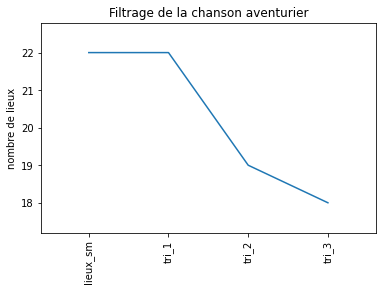

In [23]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [22, 22, 19, 18]
labels = ['lieux_sm', 'tri_1', 'tri_2', 'tri_3']

plt.plot(x, y)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
plt.title("Filtrage de la chanson aventurier")
plt.ylabel("nombre de lieux")
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

In [24]:
start2 =time.perf_counter()
loc_md=[]
for texte in f1:
    try:
        doc = nlp_md(texte)
        for entity in doc.ents:
            if entity.label_ =="LOC":
                loc_md.append(entity.text)
    except:
        pass
end2 =time.perf_counter()
ecrire_json("/Users/mustapha/Documents/GitHub/Memoire/lieux_echantillon_aprésNettoyage/lieux_aventurier_aprésFiltrage_md.json",loc_md)
print("lieux trouvés par le modèle medium : ",len(set(loc_md)))
print(set(loc_md))
print("temps :",end2-start2)
print()
print()

tri_1 = [mot for mot in loc_md if mot not in f2]
test1 = [mot for mot in loc_md if mot in f2]
print("nombre lieux qui ne se trouvent pas dans le Glaff : ", len(set(tri_1)))
print(set(tri_1))
print()
print(set(test1))
print()

tri_2 = [mot for mot in tri_1 if mot.lower() not in f2]
test2 = [mot for mot in tri_1 if mot.lower() in f2]
print("nombre lieux en miniscules qui ne se trouvent pas dans le Glaff : ",len(set(tri_2)))
print(set(tri_2))
print()
print(set(test2))
print()



tri_3 =[mot for mot in tri_2 if mot.lower() not in tri_2] 
test3 =set(tri_2).difference(tri_3)
print("nombre de lieux obtenu dans la liste finale : ", len(set(tri_3)))
print(set(tri_3))
print()
print(set(test3))
ecrire_json("/Users/mustapha/Documents/GitHub/Memoire/lieux_echantillon_aprésFiltrage/lieux_aventurier_aprésFiltrage_md.json",tri_3)

lieux trouvés par le modèle medium :  19
{'Port-Gentil', 'Binningham', 'Tampico', 'Yaoundé', 'Créteil', 'Calcutta', 'Dôle', 'Bornéo', 'Varsovie', 'Tripoli', 'Saana', 'Amsterdam', 'Téhéran', 'Kinshassa', 'Baltimore', 'Papeete', 'Lourdes', 'Bordeaux', 'Cotonou'}
temps : 0.07937766699978965


nombre lieux qui ne se trouvent pas dans le Glaff :  19
{'Port-Gentil', 'Binningham', 'Tampico', 'Yaoundé', 'Créteil', 'Calcutta', 'Dôle', 'Bornéo', 'Varsovie', 'Tripoli', 'Saana', 'Amsterdam', 'Téhéran', 'Kinshassa', 'Baltimore', 'Papeete', 'Lourdes', 'Bordeaux', 'Cotonou'}

set()

nombre lieux en miniscules qui ne se trouvent pas dans le Glaff :  16
{'Créteil', 'Bornéo', 'Varsovie', 'Tampico', 'Saana', 'Port-Gentil', 'Amsterdam', 'Téhéran', 'Kinshassa', 'Cotonou', 'Baltimore', 'Papeete', 'Yaoundé', 'Binningham', 'Calcutta', 'Dôle'}

{'Lourdes', 'Tripoli', 'Bordeaux'}

nombre de lieux obtenu dans la liste finale :  16
{'Créteil', 'Bornéo', 'Varsovie', 'Tampico', 'Saana', 'Port-Gentil', 'Amsterdam', 

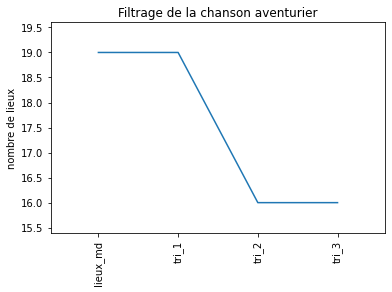

In [25]:
x = [1, 2, 3, 4]
y = [19, 19, 16, 16]
labels = ['lieux_md', 'tri_1', 'tri_2', 'tri_3']

plt.plot(x, y)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
plt.title("Filtrage de la chanson aventurier")
plt.ylabel("nombre de lieux")
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

In [26]:
start3 =time.perf_counter()
loc_lg=[]
for texte in f1:
    try:
        doc = nlp_lg(texte)
        for entity in doc.ents:
            if entity.label_ =="LOC":
                loc_lg.append(entity.text)
    except:
        pass
end3 =time.perf_counter()
ecrire_json("/Users/mustapha/Documents/GitHub/Memoire/lieux_echantillon_aprésNettoyage/lieux_aventurier_aprésFiltrage_lg.json",loc_lg)
print("lieux trouvés par le modèle large : ",len(set(loc_lg)))
print(set(loc_lg))
print("temps :",end3-start3)
print()
print()

tri_1 = [mot for mot in loc_lg if mot not in f2]
test1 = [mot for mot in loc_lg if mot in f2]
print("nombre lieux qui ne se trouvent pas dans le Glaff : ", len(set(tri_1)))
print(set(tri_1))
print()
print(set(test1))
print()

tri_2 = [mot for mot in tri_1 if mot.lower() not in f2]
test2 = [mot for mot in tri_1 if mot.lower() in f2]
print("nombre lieux en miniscules qui ne se trouvent pas dans le Glaff : ",len(set(tri_2)))
print(set(tri_2))
print()
print(set(test2))
print()



tri_3 =[mot for mot in tri_2 if mot.lower() not in tri_2] 
test3 =set(tri_2).difference(tri_3)
print("nombre de lieux obtenu dans la liste finale : ", len(set(tri_3)))
print(set(tri_3))
print()
print(set(test3))
ecrire_json("/Users/mustapha/Documents/GitHub/Memoire/lieux_echantillon_aprésFiltrage/lieux_aventurier_aprésFiltrage_lg.json",tri_3)

lieux trouvés par le modèle large :  18
{'Lourdes', 'Créteil', 'Bornéo', 'Varsovie', 'Tampico', 'Saana', 'Tripoli', 'Port-Gentil', 'Amsterdam', 'Téhéran', 'Cotonou', 'Bordeaux', 'Baltimore', 'Papeete', 'Yaoundé', 'Binningham', 'Calcutta', 'Dôle'}
temps : 0.08185268699980952


nombre lieux qui ne se trouvent pas dans le Glaff :  18
{'Lourdes', 'Créteil', 'Bornéo', 'Varsovie', 'Tampico', 'Saana', 'Tripoli', 'Port-Gentil', 'Amsterdam', 'Téhéran', 'Cotonou', 'Bordeaux', 'Baltimore', 'Papeete', 'Yaoundé', 'Binningham', 'Calcutta', 'Dôle'}

set()

nombre lieux en miniscules qui ne se trouvent pas dans le Glaff :  15
{'Créteil', 'Bornéo', 'Varsovie', 'Tampico', 'Saana', 'Port-Gentil', 'Amsterdam', 'Téhéran', 'Cotonou', 'Baltimore', 'Papeete', 'Yaoundé', 'Binningham', 'Calcutta', 'Dôle'}

{'Lourdes', 'Tripoli', 'Bordeaux'}

nombre de lieux obtenu dans la liste finale :  15
{'Créteil', 'Bornéo', 'Varsovie', 'Tampico', 'Saana', 'Port-Gentil', 'Amsterdam', 'Téhéran', 'Cotonou', 'Baltimore', 'Pape

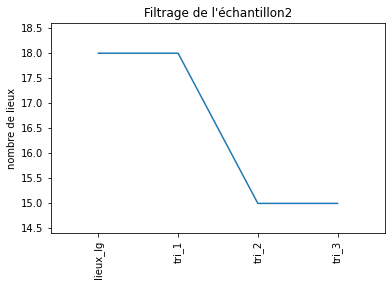

In [27]:
x = [1, 2, 3, 4]
y = [18, 18, 15, 15]
labels = ['lieux_lg', 'tri_1', 'tri_2', 'tri_3']

plt.plot(x, y)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
plt.title("Filtrage de l'échantillon2")
plt.ylabel("nombre de lieux")
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()